In [1]:
SAVE = True 
SAVE_PATH = "../charts/"
DATA_STORE_PATH_BASE = "../store/week1/"
DATA_STORE_PATH_WEEK = "../store/week2/"

In [2]:

EMPTY_CID = "QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn"
MY_PEERID = "12D3KooWBA3FLioUQPqtj3RT4fxbquGNyb2hfQwXq8UTt5xmxuCi"

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def reversed_sort_dict_by_value(dic:dict)-> dict:
    return {key:val for key, val in reversed(sorted(dic.items(), key=lambda item: item[1]))}

In [5]:
def drop_none_unique_peers(df:pd.DataFrame) -> pd.DataFrame:
    df_filtered = df.drop_duplicates(subset=['peer'], keep=False)
    df_filtered = df_filtered[df_filtered["peer"] != MY_PEERID]
    df_filtered = df_filtered.reset_index()
    return df_filtered

In [6]:
def make_peerid_short(df:pd.DataFrame) -> pd.DataFrame:
    df["peer"] = df["peer"].apply(lambda p: p[:3] + '...' + p[-5:])
    return df 

In [7]:

df = pd.read_csv(DATA_STORE_PATH_BASE + "found.csv")
df.head()

,peer,cid,filesAsStr
0,12D3KooWHsshUtLVTUccPiFdmupxm3fhTgMnnZM76KPfhS...,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN
1,12D3KooWLAGdfENUAm6o7zia5n98VrdwYAMfVFxyxVLAVc...,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN
2,12D3KooWNqmnF2DKywda1JDPaL3Ej6W1cZXF2RSbqcCwEP...,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN
3,12D3KooWCkT234YfDHFvj9wzDzwTwJxe6z35TCe1MfSxTY...,NaN,NaN
4,12D3KooWEja9effvbfwyuf4xVuLLpRL9fFYXG7cTyWnkgt...,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN


In [8]:

df = df[df["peer"] != MY_PEERID]
total = len(df["peer"].unique())
total

35083

In [9]:
cids = []
peers = set()
for i, cid in enumerate(df["cid"].dropna().unique()[:20]):
    if cid != None or cid != EMPTY_CID:
        cids.append(cid)
print(cids)

for i, peer in enumerate(df["peer"]):
    try: 
        cid = df["cid"][i+1]
        if cid in cids:
            cids.remove(cid)
            peers.add(peer)
    except:
        continue
print(peers)

['QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn', 'QmbhXhzx9eY9e5QpbeDXQ2ozk9KgdJ7VALgfXRCbohtsD5', 'QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU', 'QmZUcj7w6WALSvupbGh6hTzWC3yN9aGgHcdXTSWXXuh2rP', 'bafybeiav25f3lduu6x2ljzjmctocac3k5xh2tph5ihpv64icc7lf3qudra', 'QmUU2HcUBVSXkfWPUc3WUSeCMrWWeEJTuAgR9uyWBhh9Nf', 'QmdbGV12ji7DHvVXYiaWvWJJmnYy3V5of8fpkripPGo3jK', 'QmT1Ja1kcMh3E7xHWAc49N6BpXnWJDPCTMUWXDvnKAdvJu', 'QmT2SRqXr8KvmuQTnvxvKm6NaVy9ucYYPRpPiQp78GFP1w', 'QmNrJu5JW5RWTz2G2jgNkgCgp7RHHEk7Whi317bUNnerfu', 'QmaDGBwVyFcjiLXzwYWYDGjM2cnKmWBXHSQkCZYeYgChDj', 'Qma3747yKcgDfxay1gWHKMJmimeWA7Vi7xoVE6KR2oyhdW', 'QmYWAifyw2V5dEq7c5GgdSPffeKoYXQZggnYzw5RbXpig4', 'QmezUGmr8aGCkyBEcCGVDVQQP6mNgmmhCXYZCW5HYYXD62', 'QmepZt9TvmypWhq51TQAYJRs7bZicV3BefahjvY7exZCdL', 'QmSHR5wNWmNdjNZ5RDffjcjbNQawNX5AqBauGcgbhJERf1', 'QmaJegxhjiqho2fv6pTHCAnXjZxWg2jAy9q6m1zsR3tPsk', 'QmQRgDkSAqWAtzqQBKEbwV731KcbPtYun7KkEqAGGcFr7o', 'QmcPUJHg9jz4XXHd8NVR4LVxXCkhcXU51a13cGDu2W4CDE', 'QmeeRMns22TKCaLG69zKwPxkhWUCy9YuED9

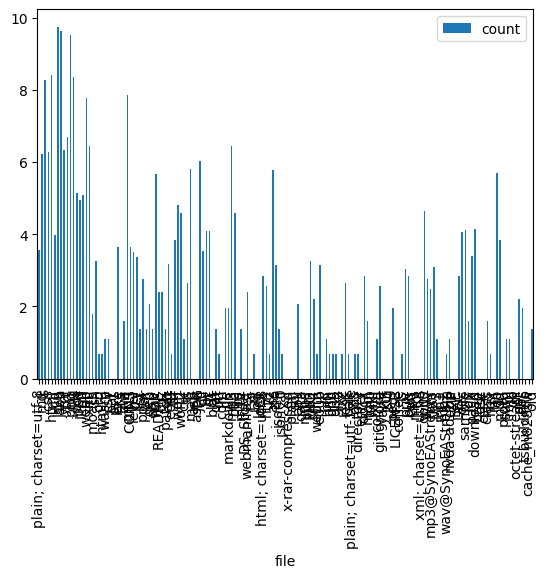

In [10]:
from collections import defaultdict
files = list(df["filesAsStr"][df["filesAsStr"].notnull()].values)
types_of_files = defaultdict(int) 
for file in files: 
    if "," in file: 
        for f in file.split(","):
            if "." in f: 
                types_of_files[f.split(".")[-1]]+=1
            elif "/" in f: 
                types_of_files[f.split("/")[1]]+=1
    else:
        types_of_files[file] +=1 
#del types_of_files["png"]
#del types_of_files["svg"]
#del types_of_files["json"]
temp = {
    "file":[],
    "count":[]
}
for k,v in types_of_files.items():
    temp["file"].append(k)
    temp["count"].append(np.log(v))
types_of_files = dict(types_of_files)
types_of_files = reversed_sort_dict_by_value(types_of_files)
pd.DataFrame(temp).set_index("file").plot.bar()
if SAVE: 
    plt.savefig(SAVE_PATH+"format_count.png",bbox_inches='tight')

In [11]:
#df_cids = df.dropna(subset=["cid"])[:1000]
#df_cids[~df_cids['cid'].duplicated(keep=False)]["peer"].to_clipboard()


In [12]:
import pandas as pd 
df = pd.read_csv(DATA_STORE_PATH_BASE + "cid_data.csv")
df = df[df["peer"] != MY_PEERID]
df = df.drop_duplicates()
unique_nr_peers = len(df["peer"].unique())
print("number of unique peers with IPNS CID",unique_nr_peers)

number of unique peers with IPNS CID 333


## From cid data 

In [13]:
df = pd.read_csv(DATA_STORE_PATH_BASE + "cid_data.csv")
#df = drop_none_unique_peers(df)
df = make_peerid_short(df)

In [14]:
from collections import defaultdict
import copy
import numpy as np

peer_size = {}
peer_size["peer"] = df["peer"]
peer_size["size"] = df["size"]

peer_size_count = defaultdict(int)
for i, p in enumerate(peer_size["peer"]): 
    peer_size_count[p]+=peer_size["size"][i]

peer_size_count_no_filter = copy.deepcopy(peer_size_count)
peer_size_count_no_filter = reversed_sort_dict_by_value(peer_size_count_no_filter)
peer_size_count = {p:s for p,s in peer_size_count.items() if s > 0}

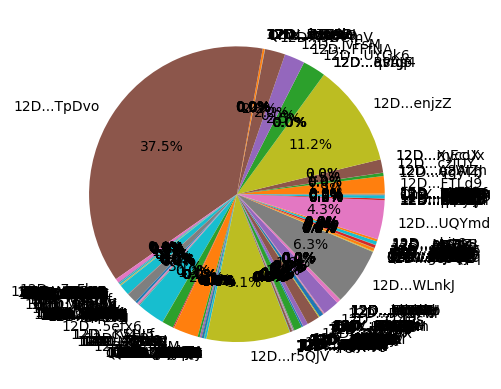

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.pie(list(peer_size_count.values()), labels=list(peer_size_count.keys()), autopct='%1.1f%%')
#plt.title("percentage of peer sizes")

if SAVE: 
    plt.savefig(SAVE_PATH+"peer_size_pie.png",bbox_inches='tight')

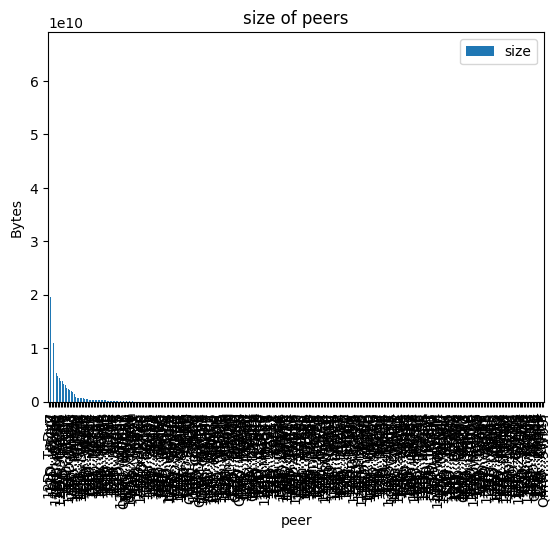

In [16]:
peer_size_count = reversed_sort_dict_by_value(peer_size_count)
size_df = pd.DataFrame({"peer":list(peer_size_count.keys()), "size":list(peer_size_count.values())})
ax = size_df.set_index("peer").plot.bar(title="size of peers")
ax.set_ylabel("Bytes")
if SAVE: 
    plt.savefig(SAVE_PATH+"peer_size.png",bbox_inches='tight')

333


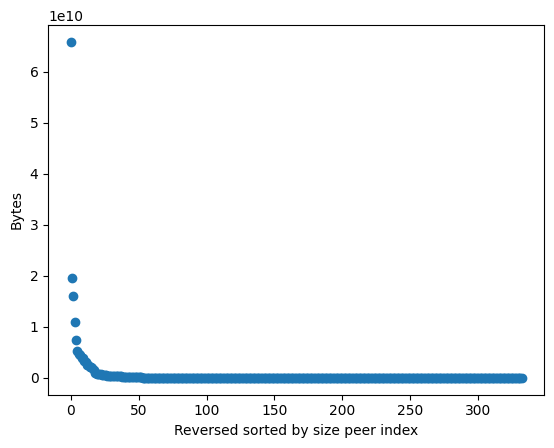

In [17]:

fig, ax = plt.subplots()
peer_size_count_no_filter = {peer_id: size for peer_id, size in reversed(sorted(peer_size_count_no_filter.items(), key=lambda item: item[1]))}
print(len(peer_size_count_no_filter))
ax.scatter([i for i in range(len(peer_size_count_no_filter))],list(peer_size_count_no_filter.values()))
#plt.title("All peer sizes")
plt.xlabel("Reversed sorted by size peer index")
plt.ylabel("Bytes")
if SAVE: 
    plt.savefig(SAVE_PATH+"peer_size_all.png",bbox_inches='tight')

/tmp/ipykernel_5476/4000406017.py:2: RuntimeWarning: divide by zero encountered in log2
  peer_size_count_no_filter_log = {peer_id: np.log2(size) for peer_id, size in reversed(sorted(peer_size_count_no_filter.items(), key=lambda item: item[1]))}


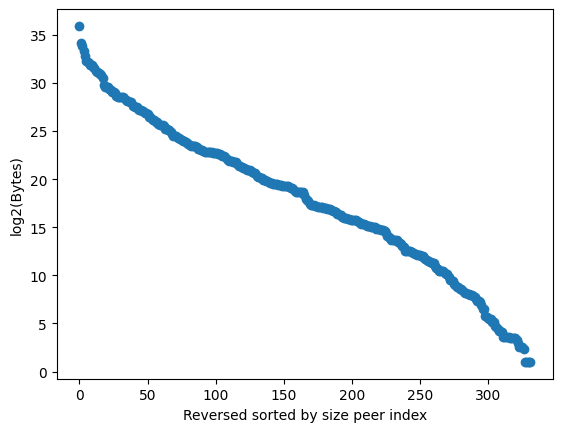

In [18]:
fig, ax = plt.subplots()
peer_size_count_no_filter_log = {peer_id: np.log2(size) for peer_id, size in reversed(sorted(peer_size_count_no_filter.items(), key=lambda item: item[1]))}

ax.scatter([i for i in range(len(peer_size_count_no_filter_log))],list(peer_size_count_no_filter_log.values()))
#plt.title("All peers log2 of sizes")
plt.xlabel("Reversed sorted by size peer index")
plt.ylabel("log2(Bytes)")
if SAVE: 
    plt.savefig(SAVE_PATH+"peer_size_all_log.png",bbox_inches='tight')

In [19]:
all_formats = df["format"].unique()
all_formats.tolist().sort()
print(all_formats)

['text/plain; charset=utf-8' 'text/html; charset=utf-8' 'image/x-icon'
 'image/svg+xml' 'application/json' 'application/javascript' 'image/png'
 'image/jpeg' 'application/pdf' 'image/gif' 'image/webp'
 'text/xml; charset=utf-8' 'text/html; charset=windows-1251'
 'application/rss+xml' 'text/plain' 'application/wasm' 'text/csv'
 'application/x-executable'
 'application/vnd.microsoft.portable-executable' 'application/x-sharedlib'
 'audio/flac' 'application/zip' 'video/mp4'
 'application/vnd.openxmlformats-officedocument.presentationml.presentation'
 'application/jar' 'application/vnd.debian.binary-package' 'text/x-php'
 'audio/wav' 'application/gzip' 'application/vnd.ms-fontobject' 'font/ttf'
 'font/woff' 'font/woff2' 'application/x-xz' 'application/octet-stream'
 'font/otf' 'text/html; charset=iso-8859-1' 'audio/mpeg' 'audio/ogg'
 'video/x-m4v' 'application/atom+xml' 'application/x-7z-compressed'
 'application/x-rar-compressed' 'video/quicktime' 'video/webm'
 'application/epub+zip' 'text

average file size 2.1101290900732863


175.349617256

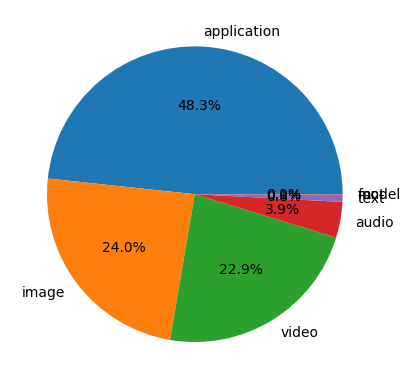

In [20]:
format_size_count = defaultdict(int)
_sum = 0
print("average file size", df["size"].mean()/10**6)
for i, f in enumerate(df["format"]):
    size =  df["size"][i]
    format_size_count[f.split("/")[0]] += size
    _sum += size

format_size_count = {f:s for f,s in format_size_count.items() if s > 2**10}
format_size_count = reversed_sort_dict_by_value(format_size_count)

fig, ax = plt.subplots()
ax.pie(list(format_size_count.values()), labels=list(format_size_count.keys()), autopct='%1.1f%%')
#plt.title("Files format as percentage of file size ")
if SAVE: 
    plt.savefig(SAVE_PATH+"files_format_prec.png",bbox_inches='tight')
_sum / 10**9 

In [21]:

df.head()

,peer,cid,filename,size,format
0,12D...vvKGa,QmbhXhzx9eY9e5QpbeDXQ2ozk9KgdJ7VALgfXRCbohtsD5,NONE,18,text/plain; charset=utf-8
1,QmY...yJwiJ,QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU...,CODE_OF_CONDUCT.md,5239,text/plain; charset=utf-8
2,QmY...yJwiJ,QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU...,LICENSE,34444,text/plain; charset=utf-8
3,QmY...yJwiJ,QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU...,config.js,2487,text/plain; charset=utf-8
4,QmY...yJwiJ,/ipfs/QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUP...,style.css,9105,text/plain; charset=utf-8


In [22]:
#df_format_prec = df.groupby(['peer', 'format']).size().unstack(fill_value=0)
#df_format_prec = df_format_prec.div(df_format_prec.sum(axis=1), axis=0) * 100
#df_format_prec.plot(kind='bar', stacked=True, figsize=(10, 6))
#plt.xlabel('Peer')
#plt.ylabel('Percentage')
#plt.title('Formats used by peers')
#plt.legend(title='Format', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.tight_layout()
#
#if SAVE: 
#    plt.savefig(SAVE_PATH+"formats_used_by_nodes.png",bbox_inches='tight')
#

In [23]:
#df_temp = df.copy()
#df_temp["filename"] = df_temp["filename"].apply(lambda f: str(f))
#df_temp["filename"] = df_temp["filename"].apply(lambda f: ''.join([c for c in f if not c.isdigit()]))
#df_temp["filename"] = df_temp["filename"].apply(lambda f: f.split(".")[-1])
#for i, filename in enumerate(df_temp["filename"]):
#    if filename == "NONE":
#        df_temp["filename"][i] = df_temp["format"][i]
#df_file_name_peer = df_temp.groupby(['peer', 'filename']).size().unstack(fill_value=0)
#df_file_name_peer= df_file_name_peer.div(df_file_name_peer.sum(axis=1), axis=0) * 100
#df_file_name_peer.plot(kind='bar', stacked=True, figsize=(10, 6))
#plt.xlabel('Peer')
#plt.ylabel('Percentage')
#plt.title('File types used by peers')
#plt.legend(title='File type', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.tight_layout()


In [24]:
df.head()

,peer,cid,filename,size,format
0,12D...vvKGa,QmbhXhzx9eY9e5QpbeDXQ2ozk9KgdJ7VALgfXRCbohtsD5,NONE,18,text/plain; charset=utf-8
1,QmY...yJwiJ,QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU...,CODE_OF_CONDUCT.md,5239,text/plain; charset=utf-8
2,QmY...yJwiJ,QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU...,LICENSE,34444,text/plain; charset=utf-8
3,QmY...yJwiJ,QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU...,config.js,2487,text/plain; charset=utf-8
4,QmY...yJwiJ,/ipfs/QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUP...,style.css,9105,text/plain; charset=utf-8


36
['CODE_OF_CONDUCT.md', 'ARCHITECTURE.md', 'DEPLOYMENT.md', 'OVERVIEW.md', 'PHILOSOPHY.md', 'README.md', 'start.md', 'community_modules.md', 'discuss.md', 'admins.md', 'advanced_logging.md', 'advanced_ssl_config.md', 'anonymous_logins.md', 'authentication.md', 'backups.md', 'certificates.md', 'chatrooms.md', 'components.md', 'configure.md', 'console.md', 'contributing.md', 'coturn.md', 'creating_accounts.md', 'cyrus_sasl.md', 'data_storage.md', 'depends.md', 'certmanager.md', 'configmanager.md', 'hostmanager.md', 'loggingmanager.md', 'moduleapi.md', 'modulemanager.md', 'portmanager.md', 'rostermanager.md', 's2smanager.md', 'sessionmanager.md', 'stanza_router.md', 'statsmanager.md', 'storagemanager.md', 'usermanager.md', 'events.md', 'global_modules.md', 'http.md', 'moduleapi.md', 'mod_adhoc.md', 'mod_storage_sql.md', 'modules.md', 'http.md', 'network.md', 'roster.md', 'sessions.md', 'telnet.md', 'adhoc.md', 'argparse.md', 'array.md', 'async.md', 'bit53.md', 'bitcompat.md', 'cache.md'

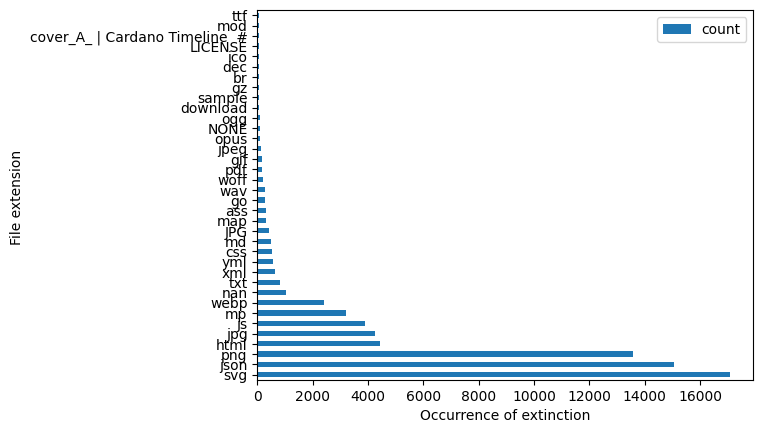

In [25]:
file_type_count = defaultdict(int)
markdown_files = []
for t in df["filename"]:
    ftype = str(t).split(".")[-1]
    ftype = ''.join([c for c in ftype if not c.isdigit()])
    if ftype == "":
        ftype = str(t)
    if ftype == "md": 
        markdown_files.append(t)
    file_type_count[ftype] += 1 

file_type_count = {t:c for t,c in file_type_count.items() if c > 2*20}
file_type_count = reversed_sort_dict_by_value(file_type_count)
print(len(file_type_count))

print(markdown_files)
print("number of markdown files:", len(markdown_files))

file_type_count = dict(file_type_count)
file_type_count = pd.DataFrame({"filetype": list(file_type_count.keys()), "count":list(file_type_count.values())})
file_type_count = file_type_count.set_index("filetype")
file_type_count.plot.barh()
#plt.title("Files extinction occurrences")
plt.xlabel("Occurrence of extinction")
plt.ylabel("File extension ")

if SAVE: 
    plt.savefig(SAVE_PATH+"files_extensions_count.png",bbox_inches='tight')


In [26]:
#import numpy as np
#file_type_size = defaultdict(int)
#for i,t in enumerate(df["filename"]):
#    ftype = str(t).split(".")[-1]
#    ftype = ''.join([c for c in ftype if not c.isdigit()])
#    if ftype == "":
#        ftype = str(t)
#    file_type_size[ftype] += int(df["size"][i])
#
#file_type_count = dict(file_type_count)
#file_type_size = { t:s for t,s in file_type_size.items() if s > 2**2}
#file_type_size = reversed_sort_dict_by_value(file_type_size)
#
#file_type_size = pd.DataFrame({"filetype": list(file_type_size.keys()), "size":list(file_type_size.values())})
#file_type_size = file_type_size.set_index("filetype")
#file_type_size.plot.barh()
#plt.title("Files extinction sizes")
#plt.xlabel("sum size in bytes")
#plt.ylabel("File extension ")
#
#
#if SAVE: 
#    plt.savefig(SAVE_PATH+"file_extinction_size.png",bbox_inches='tight')

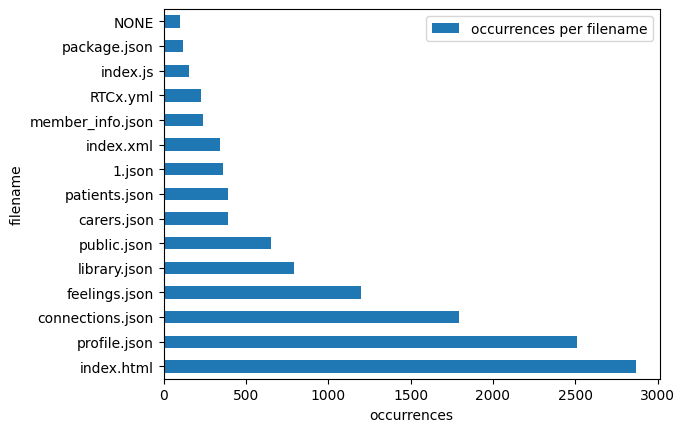

In [27]:

file_names_count = df["filename"].value_counts()
file_names_count = file_names_count[file_names_count >= 100]
file_names_count = reversed_sort_dict_by_value(file_names_count.to_dict())


file_names_count = pd.DataFrame({"filename": list(file_names_count.keys()), "occurrences per filename":list(file_names_count.values())})
file_names_count = file_names_count.set_index("filename")
file_names_count.plot.barh()
#plt.title("Filename occurrences")
plt.xlabel("occurrences")


if SAVE: 
    plt.savefig(SAVE_PATH+"filename_count.png",bbox_inches='tight')


In [28]:
searchable = []
for i, filename in enumerate(df["filename"]): 
        if "readme" in str(filename).lower():
            searchable.append(df["cid"][i])
            print(df["cid"][i])
            print("-"*10)

print("Number of possible readme files: ",len(searchable))

QmZUcj7w6WALSvupbGh6hTzWC3yN9aGgHcdXTSWXXuh2rP/README.md
----------
QmT1Ja1kcMh3E7xHWAc49N6BpXnWJDPCTMUWXDvnKAdvJu/README.html
----------
/ipfs/QmTE9NDErW7C81RqvNTzATKQET7SRrU3BzrywNzu1iXWWX/PBSIPs/32bit/PBIP1.README
----------
/ipfs/QmTE9NDErW7C81RqvNTzATKQET7SRrU3BzrywNzu1iXWWX/PBSIPs/32bit/PBIP2.README
----------
/ipfs/QmTE9NDErW7C81RqvNTzATKQET7SRrU3BzrywNzu1iXWWX/PBSIPs/32bit/PBIP3.README
----------
/ipfs/QmTE9NDErW7C81RqvNTzATKQET7SRrU3BzrywNzu1iXWWX/PBSIPs/32bit/PBIP4.README
----------
/ipfs/QmTE9NDErW7C81RqvNTzATKQET7SRrU3BzrywNzu1iXWWX/PBSIPs/32bit/PBIP5.README
----------
/ipfs/QmTE9NDErW7C81RqvNTzATKQET7SRrU3BzrywNzu1iXWWX/PBSIPs/32bit/PBIP6.README
----------
/ipfs/QmTE9NDErW7C81RqvNTzATKQET7SRrU3BzrywNzu1iXWWX/PBSIPs/32bit/PBIP7.README
----------
/ipfs/QmTE9NDErW7C81RqvNTzATKQET7SRrU3BzrywNzu1iXWWX/PBSIPs/32bit/PBIP8.README
----------
/ipfs/QmTE9NDErW7C81RqvNTzATKQET7SRrU3BzrywNzu1iXWWX/PBSIPs/64bit/PBIP64_P3.README
----------
/ipfs/QmTE9NDErW7C81RqvNTzATKQET7SRrU3BzrywNzu1i

In [29]:
peers_with_index = []
for i,fn in enumerate(df["filename"]):
    p = df["cid"][i].split("/")[0]
    if "index.html" in str(fn) and not p in peers_with_index and p != "":
        peers_with_index.append(p)
print("Number of websites found:",len(peers_with_index))
print(peers_with_index)

Number of websites found: 94
['QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU', 'QmZUcj7w6WALSvupbGh6hTzWC3yN9aGgHcdXTSWXXuh2rP', 'QmT1Ja1kcMh3E7xHWAc49N6BpXnWJDPCTMUWXDvnKAdvJu', 'QmT2SRqXr8KvmuQTnvxvKm6NaVy9ucYYPRpPiQp78GFP1w', 'Qma3747yKcgDfxay1gWHKMJmimeWA7Vi7xoVE6KR2oyhdW', 'QmezUGmr8aGCkyBEcCGVDVQQP6mNgmmhCXYZCW5HYYXD62', 'QmdvJFBWbwui53tWpZGGn4pArvUGL6318a3ytdn69v2yti', 'QmYjrZNcJ6TLEbZySfTDs4NdkeohPGFTmtD4ZiCVmmLMPU', 'QmYjL57tJpxS4LTsyvkwBiusF9xsuoUyiY5pab6GcMj9jx', 'QmTE9NDErW7C81RqvNTzATKQET7SRrU3BzrywNzu1iXWWX', 'QmWm5gdnxrgdDmpu8JNSsNCihTBw7J3akqXYqyGe7zSi28', 'QmbZTsDJPgjDEqPiioxBTnYnsRDSqHMDFUBsALg9J5MNLU', 'QmR8UuZGuAo7PSVDxzLSDKoThShAzsvLrs3EmmCaUoajGx', 'QmUPRNuNmKPgzCPrexfgZXsPqghmanDrGRSBE5BY59APa4', 'QmcBe2ePTf8SDiuHH63gyQnoC1Bvx72hFJjAGZg7m8TSK7', 'QmS8DvEzaK37nCdkFAP5SFgJgcwF3oM6VRjsHVzhrToBat', 'Qmc3Q8nU9R3GKHmPKEFwPXnsM7zqx3MFjRDVnHrBAYAPAf', 'QmNoBHWTxaKNFccPtq6RS2W9sivxLddfaro9xfCb8C1iwA', 'QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFXiXoQMC', 'Qmab2TwXBgVgRra6SnA

format count relative to node size, meaning that files that occurs often on a lot of different nodes are the most relevant nodes.  

Peers with html: 127
20


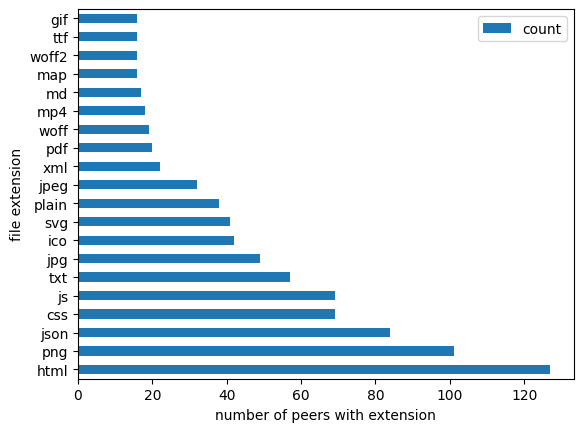

In [30]:
file_extension_peer_distribution = defaultdict(set)
NUMBER_OF_OCCURRENCES_MINIMUM = 15
for i,fn in enumerate(df["filename"]):
    file_extension = str(fn).split(".")[-1]
    if file_extension == "NONE" or file_extension == "nan":
        file_extension = df["format"][i].split(";")[0].split("/")[-1]
    peer = df["peer"][i]
    file_extension_peer_distribution[file_extension].add(peer)
print("Peers with html:",len(file_extension_peer_distribution["html"]))
file_extension_peer_distribution= {p:len(s) for p,s in file_extension_peer_distribution.items() if len(s) > NUMBER_OF_OCCURRENCES_MINIMUM}
print(len(file_extension_peer_distribution))
file_extension_peer_distribution = reversed_sort_dict_by_value(file_extension_peer_distribution)
fe_df = pd.DataFrame({"file extension":list(file_extension_peer_distribution.keys()), "count": list(file_extension_peer_distribution.values())})
fe_df = fe_df.set_index("file extension")
fe_df.plot.barh()
#plt.title("Peers with file extension")
plt.xlabel("number of peers with extension")


if SAVE: 
    plt.savefig(SAVE_PATH+"peer_count_with_extension.png",bbox_inches='tight')

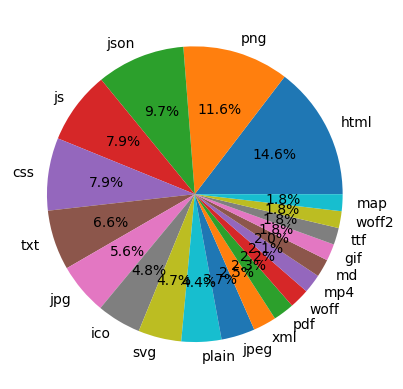

In [31]:
unique_nr_peers = len(df["peer"].unique())
file_extension_peer_distribution_prec = {p:s / unique_nr_peers for p,s in file_extension_peer_distribution.items()}
file_extension_peer_distribution_prec = reversed_sort_dict_by_value(file_extension_peer_distribution_prec)
fig, ax = plt.subplots()
ax.pie(list(file_extension_peer_distribution_prec.values()), labels=list(
    file_extension_peer_distribution_prec.keys()), autopct='%1.1f%%')
#plt.title("File extension hosted by peers ")

if SAVE: 
    plt.savefig(SAVE_PATH+"peer_count_with_extension_pie.png",bbox_inches='tight')

In [32]:
cnt = 0 
for i,cid in enumerate(df["cid"].unique()):
    if cid:
        cnt+=1
print(cnt)

82003


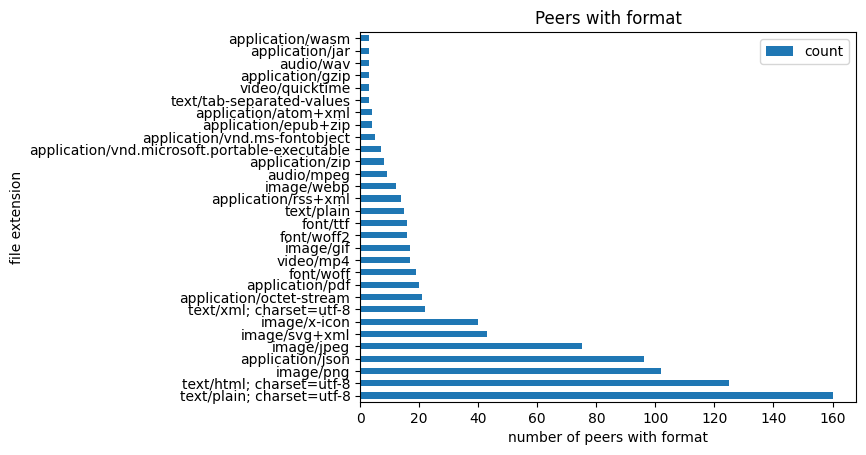

In [33]:
format_peer_distribution = defaultdict(set)
NUMBER_OF_OCCURRENCES_MINIMUM = 2

for i,fn in enumerate(df["filename"]):
    _format = df["format"][i]#.split("/")[0]
    peer = df["peer"][i]
    format_peer_distribution[_format].add(peer)

format_peer_distribution = {p:len(s) for p,s in format_peer_distribution.items() if len(s) > NUMBER_OF_OCCURRENCES_MINIMUM}
format_peer_distribution = reversed_sort_dict_by_value(format_peer_distribution)
fe_df = pd.DataFrame({"file extension":list(format_peer_distribution.keys()), "count": list(format_peer_distribution.values())})
fe_df = fe_df.set_index("file extension")
fe_df.plot.barh()
plt.title("Peers with format")
plt.xlabel("number of peers with format")

if SAVE: 
    plt.savefig(SAVE_PATH+"peers_count_format.png",bbox_inches='tight')

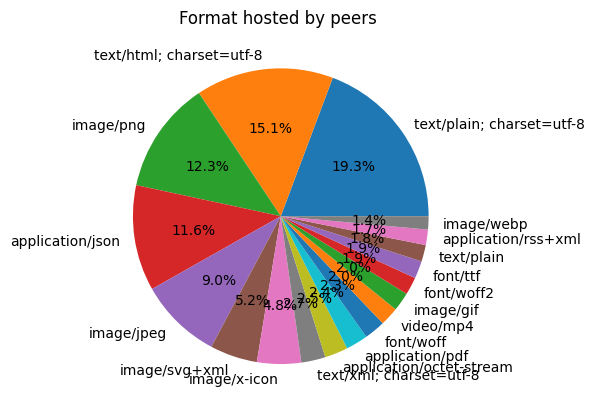

In [34]:
unique_nr_peers = len(df["peer"].unique())
format_peer_distribution_prec = {p:s / unique_nr_peers for p,s in format_peer_distribution.items() if s > 10}
fig, ax = plt.subplots()
ax.pie(list(format_peer_distribution_prec.values()), labels=list(
    format_peer_distribution_prec.keys()), autopct='%1.1f%%')
plt.title("Format hosted by peers ")

if SAVE: 
    plt.savefig(SAVE_PATH+"peers_count_format_pie.png",bbox_inches='tight')

### Looking at the times of found peers


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [36]:
df = pd.read_csv(DATA_STORE_PATH_BASE + "time.csv")
df = drop_none_unique_peers(df)
len(df)
df.head()

,index,peer,time,cid
0,1,12D3KooWLAGdfENUAm6o7zia5n98VrdwYAMfVFxyxVLAVc...,2023-07-03 09:55:16,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn
1,2,12D3KooWNqmnF2DKywda1JDPaL3Ej6W1cZXF2RSbqcCwEP...,2023-07-03 09:56:20,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn
2,13,12D3KooWL5rvBiZBE9NDWYfbCGSTfQpbScQPxDTfutLbVB...,2023-07-03 10:00:53,NONE
3,24,12D3KooWLqoT92535eKyJeECYQDoRihZs7PQLE3MEC2Z7u...,2023-07-03 10:03:34,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn
4,26,12D3KooWDDDV1iEDURwPMtipAuUEjgGQ8y7TvMGkHwrXv8...,2023-07-03 10:03:36,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn


In [37]:
df['time'] = pd.to_datetime(df['time'])
df = df[df["peer"] != MY_PEERID]
print(len(df['peer'].unique()))

35054


Text(0.5, 0, 'number of restarts')

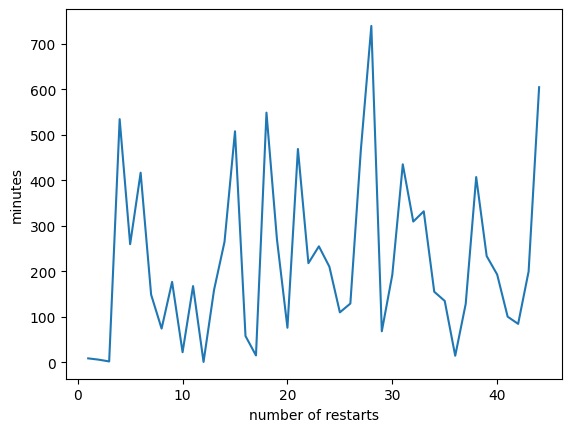

In [38]:
crashes = pd.read_csv(DATA_STORE_PATH_BASE + "node_crash.csv")
crashes["time"] = pd.to_datetime(crashes["time"])
time_diff = crashes['time'].diff().dt.total_seconds() / 60
time_diff.plot()
plt.ylabel("minutes")
plt.xlabel("number of restarts")

324


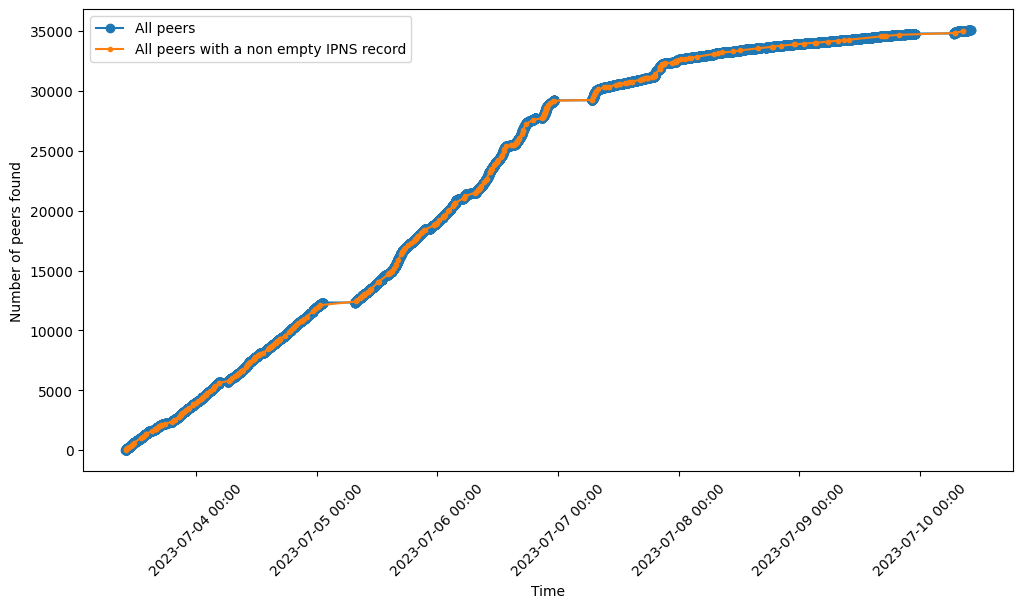

In [39]:
plt.figure(figsize=(12, 6))
df.reset_index(drop=True, inplace=True)
x = df["time"]
y = df.index.to_list()
df = df[df["cid"] != EMPTY_CID]
df = df[df["cid"] != "NONE"]
print(len(df))
plt.xlabel('Time')
plt.ylabel('Number of peers found')
#plt.title('Timestamp of all new peers found')
date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.plot(x, y, marker='o', label="All peers")
plt.plot(df['time'], df.index, marker='.', label="All peers with a non empty IPNS record")
#plt.scatter(crashes["time"], [1]*len(crashes), marker="$S$", label="Restarts", color="red")
plt.legend()

if SAVE: 
    plt.savefig(SAVE_PATH+"peers_time.png",bbox_inches='tight')

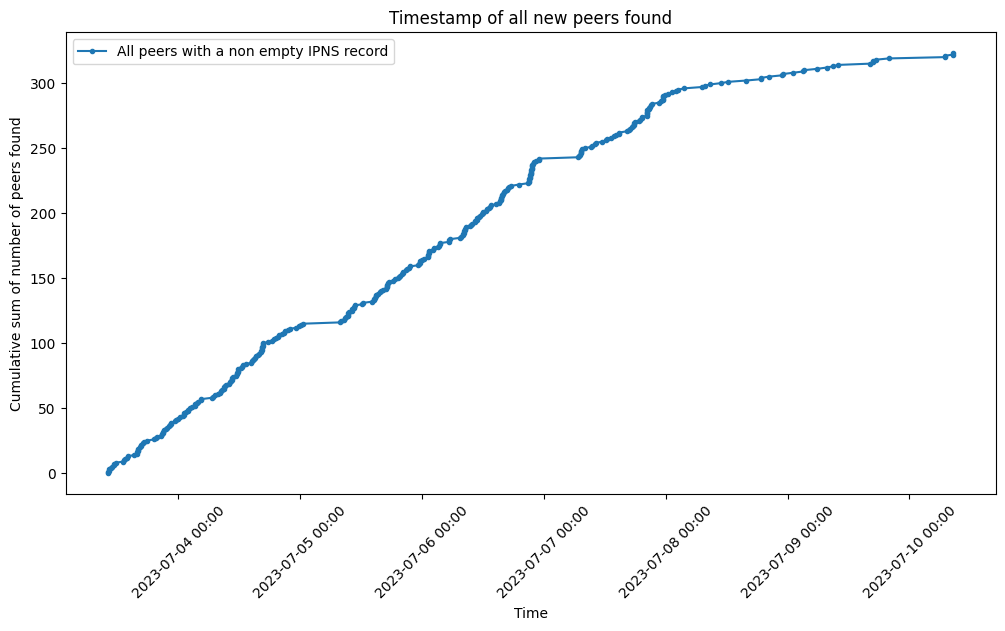

In [40]:
plt.figure(figsize=(12, 6))
df.reset_index(drop=True, inplace=True)
plt.xlabel('Time')
plt.ylabel('Cumulative sum of number of peers found')
plt.title('Timestamp of all new peers found')
date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.plot(df['time'], df.index, marker='.', label="All peers with a non empty IPNS record")
plt.legend()
plt.show()


30.934984520123837

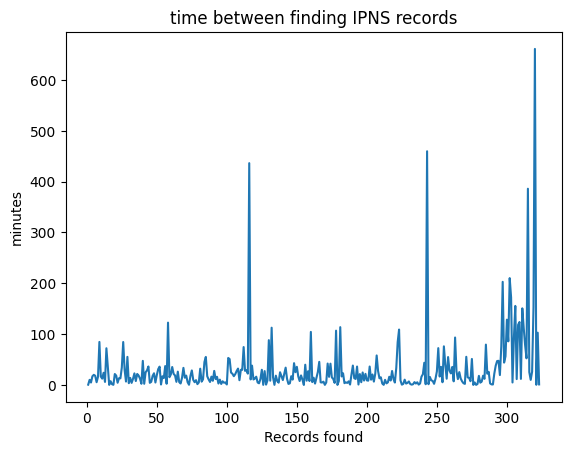

In [41]:
time_diff = df['time'].diff().dt.total_seconds() / 60
time_diff.plot()
plt.ylabel("minutes")
plt.xlabel("Records found")
plt.title("time between finding IPNS records")

time_diff.mean()


In [42]:
df = df[df["cid"] != EMPTY_CID]
df = df[df["cid"] != "NONE"]
print(len(df['peer'].unique()))

324


### Number of peers hosting cids

In [43]:
from collections import defaultdict
import matplotlib.ticker as ticker

In [44]:
df = pd.read_csv(DATA_STORE_PATH_BASE + "number_of_hosts.csv")
df = drop_none_unique_peers(df)
print(len(df["peer"].unique()))
df.head()

334


,index,cid,peer,other_peers
0,0,QmbhXhzx9eY9e5QpbeDXQ2ozk9KgdJ7VALgfXRCbohtsD5,12D3KooWEbtpN5F2jqtEUQZnveRgsE3kWSyZbCtzgwc8XP...,12D3KooWHmEdF3PpiUWFSSc8oJZnwtLpFFNVhLVQxXrCVg...
1,1,QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU,QmYGVgGGfD5N4Xcc78CcMJ99dKcH6K6myhd4Uenv5yJwiJ,12D3KooWBA3FLioUQPqtj3RT4fxbquGNyb2hfQwXq8UTt5...
2,2,QmZUcj7w6WALSvupbGh6hTzWC3yN9aGgHcdXTSWXXuh2rP,12D3KooWEMCvm5EpGTVYeWVm8bCzeCAgRPRgLi9HV4GUfF...,12D3KooWBA3FLioUQPqtj3RT4fxbquGNyb2hfQwXq8UTt5...
3,3,bafybeiav25f3lduu6x2ljzjmctocac3k5xh2tph5ihpv6...,12D3KooWBMo99iEN3u4uuy2N8pTtnSiTiecvc83sHj48xi...,12D3KooWBMo99iEN3u4uuy2N8pTtnSiTiecvc83sHj48xi...
4,4,QmUU2HcUBVSXkfWPUc3WUSeCMrWWeEJTuAgR9uyWBhh9Nf,12D3KooWJ89EV5wjkfHDCtoa6p9f9JPiJoawy6WS83W8Yw...,12D3KooWCwgMCwEubQoh8w9BCy8euS7rEs2K7jHU8oejFc...


In [45]:
cid_hosts_count = defaultdict(int)
#df = df[df["cid"] != EMPTY_CID]
for i, peers in enumerate(df["other_peers"]):
    if not pd.notna(peers):
        cid_hosts_count[i] += 0
    else:
        filtered_peers = [p for p in peers.split(",") if p != MY_PEERID]
        nr_peers = len(filtered_peers)
        cid_hosts_count[i] += nr_peers
        
print("number of peer",len(cid_hosts_count))
#cid_hosts_count = {k:v for k,v in cid_hosts_count.items() if v != 20}
cid_hosts_count = reversed_sort_dict_by_value(cid_hosts_count)
list(cid_hosts_count.values())[0]

number of peer 334


20

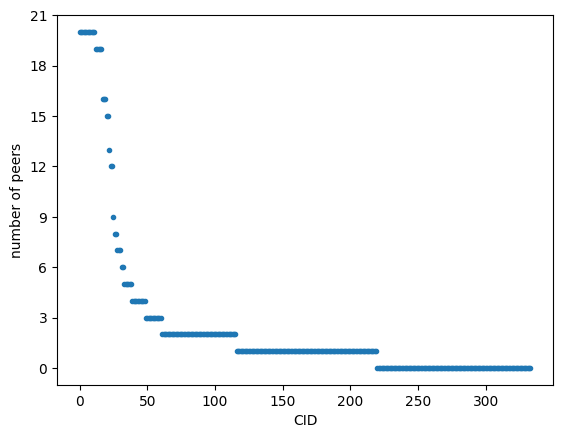

In [46]:
cid_hosts = pd.DataFrame({"cid":list(range(len(cid_hosts_count))), "peers":list(cid_hosts_count.values())})
cid_hosts = cid_hosts.set_index("cid")
fig, ax = plt.subplots()
ax.scatter(x=list(range(len(cid_hosts_count))), y=list(cid_hosts_count.values()), marker=".")
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
#plt.title("Number of peers hosting a CID")
plt.ylabel("number of peers")
plt.xlabel("CID")

if SAVE: 
    plt.savefig(SAVE_PATH+"peers_hosting_cids.png",bbox_inches='tight')

## Rate of change 

In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [48]:

def get_initial_set(file_path):
    df_nodes_set = pd.read_csv(file_path)
    df_nodes_set.drop('time', axis=1, inplace=True)
    df_nodes_set = df_nodes_set.sort_values("peer")
    df_nodes_set = df_nodes_set.drop_duplicates(subset="peer")
    df_nodes_set.reset_index(drop=True, inplace=True)
    return df_nodes_set


In [49]:
def week_compare_data(file):
    df = pd.read_csv(file)
    df.drop('time', axis=1, inplace=True)
    peer_counts = df['peer'].value_counts()
    df[df['peer'].isin(peer_counts[peer_counts == 1].index)]
    df = df.sort_values("peer")
    df = df.drop_duplicates(subset="peer")
    df.reset_index(drop=True, inplace=True)
    return df

In [50]:

week_files = [f"../store/week{w}/time.csv" for w in range(1,5)]
print(week_files)
def get_change(init_set, week_files):
    changed_peers = [1]
    for f in week_files:
        week_df = week_compare_data(f)
        intersection = init_set.merge(week_df, how='inner')
        intersection.head()
        perc_change =  len(intersection) / len(init_set)
        changed_peers.append(perc_change)
    return changed_peers

['../store/week1/time.csv', '../store/week2/time.csv', '../store/week3/time.csv', '../store/week4/time.csv']


[1, 0.09360068259385665, 0.06860068259385665, 0.0]


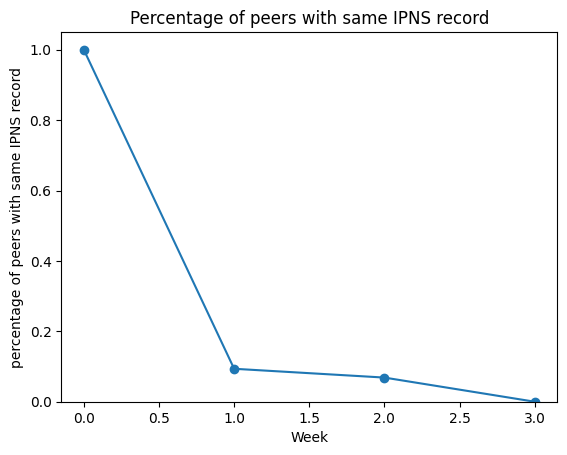

In [51]:
changed_peers = get_change(get_initial_set(week_files[0]), week_files[1:])
print(changed_peers)
fig, ax = plt.subplots()
ax.plot([0,1,2,3], changed_peers, marker="o")
ax.set_ylim(ymin=0)
plt.title("Percentage of peers with same IPNS record")
plt.xlabel("Week")
plt.ylabel("percentage of peers with same IPNS record")
plt.show()

## crashes 

In [52]:
df = pd.read_csv("../store/week1/node_crash.csv")
df

,time,crashed
0,2023-07-03 09:54:10,started
1,2023-07-03 10:02:31,started
2,2023-07-03 10:08:03,started
3,2023-07-03 10:09:38,started
4,2023-07-03 19:04:05,started
5,2023-07-03 23:23:33,started
6,2023-07-04 06:20:13,started
7,2023-07-04 08:48:43,started
8,2023-07-04 10:02:33,started
9,2023-07-04 12:59:07,started


In [53]:
df['time'] = pd.to_datetime(df['time'])

Text(0.5, 0, 'isinstance of crashing')

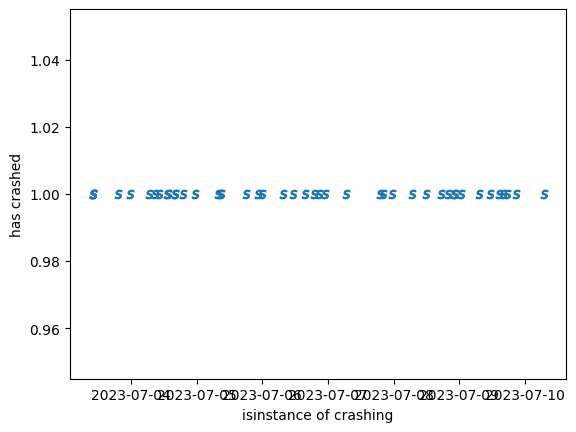

In [54]:

plt.scatter(x=df["time"], y=[1]*len(df), marker="$S$")
plt.ylabel("has crashed")
plt.xlabel("isinstance of crashing")

## checking 

In [55]:
checked = pd.read_csv("../store/week2/time.csv")
checked.head()

,peer,time,cid
0,12D3KooWKnxvF2bF9M2YfyGdf8XYCbpoUYJe5qWP8MQfpV...,2023-07-17 05:34:41,QmWZWRpAUjh3PUqED3Ps4aKhdyJGRZEyycgBgrfQLxNEg5...
1,QmSjGmuHCGDDennPzBQy1mjD918NrZ7XfGUfy3YQ7AH8LN,2023-07-17 05:38:47,QmY5jXoexekDfgQBgksr3bNXYamGdqR9hu9gpRZDM2fV5Y
2,12D3KooWFeHu75n14FDrSUDXbb7cXhRUJCYxsRCQLA8nZ9...,2023-07-17 05:39:46,ZCJ7vCLm6VphC9VUMyiWAnfk8eGTBSxd7SZj236r3oWBABVaq
3,12D3KooWKDQ7UkeL9TzTwLty6GuZzEkHdRm8qgcVLiiTZF...,2023-07-17 05:40:51,bafybeia47lwoqxe63utbcy3bgkgspsve34fs2rrrxeuax...
4,12D3KooWHou2VDpmvPUmv1bvuEBUdV6VTauzxAgb8xLUYS...,2023-07-17 05:42:48,bafybeih3eeqy6lnypxh3h5yfi7x7gcryhsf7xkh7h7srt...


In [56]:
checked["time"] = pd.to_datetime(checked["time"])

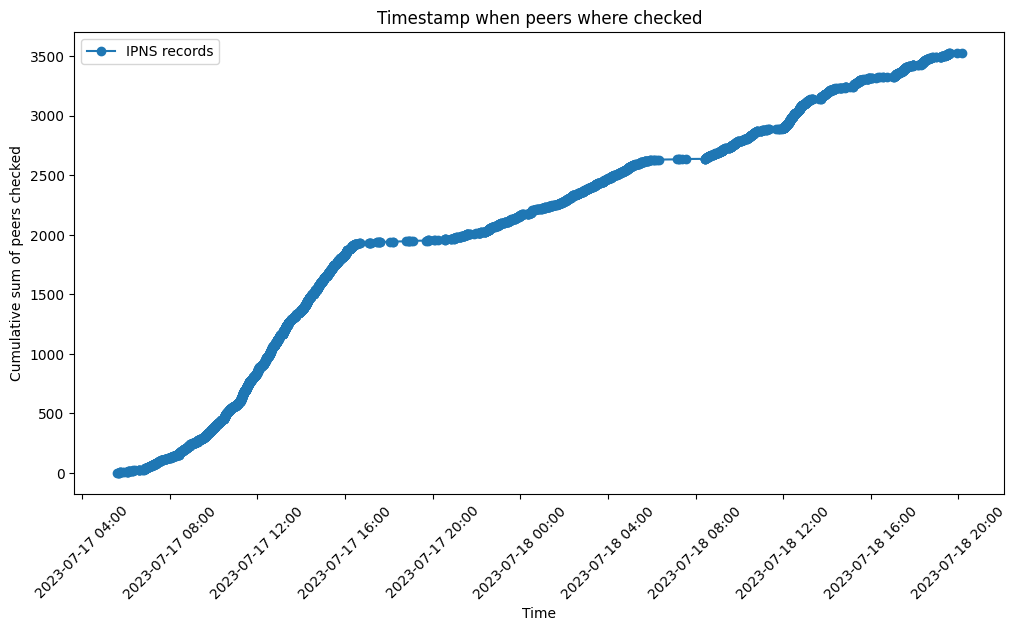

In [57]:
plt.figure(figsize=(12, 6))
plt.xlabel('Time')
plt.ylabel('Cumulative sum of peers checked')
plt.title('Timestamp when peers where checked')
date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.plot(checked['time'], checked.index, marker='o', label="IPNS records")
plt.legend()
plt.show()